# BLG 527E - Machine Learning
## Term Project

In [1]:
#import neccessary libraries
import warnings
import os
warnings.filterwarnings('ignore')

#libraries for data analysis
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)


#show all row and column values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Description
### Citation Knowledge with Position Dataset

This dataset contains information from scientific publications written by authors who have published papers in the RecSys conference. It contains four files which have information extracted from scientific publications. The details of each file are explained below:

i) all_authors.tsv: This file contains the details of authors who published research papers in the RecSys conference. The details include authors' identifier in various forms, such as number, orcid id, dblp url, dblp key and google scholar url, authors' first name, last name and their affiliation (where they work)

ii) all_publications.tsv: This file contains the details of publications authored by the authors mentioned in the all_authors.tsv file (Please note the list of publications does not contain all the authored publications of the authors, refer to the publication for further details).

The details include publications' identifier in different forms (such as number, dblp key, dblp url, dblp key, google scholar url), title, filtered title, published date, published conference and paper abstract.

iii) selected_author_publications_information.tsv: This file consists of identifiers of authors and their publications. Here, we provide the information of selected authors and their publications used for our experiment.

iv) selected_publication_citations_information.tsv: This file contains the information of the selected publications which consists of both citing and cited papers’ information used in our experiment. It consists of identifier of citing paper, identifier of cited paper, citation title, citation filtered title, the sentence before the citation is mentioned, citing sentence, the sentence after the citation is mentioned, citation position (section).

Please note, it does not contain information of all the citations cited in the publications. For more detail, please refer to the paper.

This dataset is for the use of research purposes only and if you use this dataset, please cite our paper "Capturing and exploiting citation knowledge for recommending recently published papers".

https://ieeexplore.ieee.org/abstract/document/9338486

In [2]:
#read data from .tsv files
df_all_authors = pd.read_csv("all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("selected_publication_citations_information.tsv", sep='\t')


### Data Exploration

In [ ]:
#Author Data
print(df_all_authors.columns)
print(df_all_authors.shape)
df_all_authors.head(3)

In [ ]:
#Author Data
print(df_all_authors.info())

In [ ]:
#All Publications Data
print(df_all_publications.columns)
print(df_all_publications.shape)
df_all_publications.head(5)

In [ ]:
#All Publications Data
print(df_all_publications.info())

In [ ]:
#Selected Author Publications Data
print(df_selected_author_publications.columns)
print(df_selected_author_publications.shape)
df_selected_author_publications.head(5)

In [ ]:
#Selected Author Publications Data
print(df_selected_author_publications.info())

#There are 547 authors in this dataset.
print(len(df_selected_author_publications['author'].unique()))

In [ ]:
#Selected Publication Citations Data
print(df_selected_publication_citations.columns)
print(df_selected_publication_citations.shape)
df_selected_publication_citations.head(5)

# Ex 0: Paper #1 quoted paper 5835. Citation title etc information belongs to paper number 5835.

In [ ]:
#Selected Publication Citations Data
print(df_selected_publication_citations.info())

## Data Preprocessing

In this section, the operations that may be required for preprocessing the data are shared with an example. These are just a few basics, different preprocessing need to be added if needed.

1.   **Duplicate samples:**
2.   **Non-informative Features:** 
3.   **NA (Not Available) Values:**


--------------------------------

1.   **Duplicate samples:**

In [ ]:
print(df_selected_publication_citations.shape)
df_selected_publication_citations.head(5)
#It seems 0,1 & 2 are duplicated rows.

In [ ]:
#Drop duplicated rows
df_selected_publication_citations.drop_duplicates(inplace=True)

print(df_selected_publication_citations.shape)
df_selected_publication_citations.head(5)

2.   **Non-informative Features:** 


In [ ]:
#For this dataset, information such as the name of the author and orcid_id should be dropped, as it will not help the prediction models.
print(df_all_authors.shape)
df_all_authors.head(3)

In [ ]:
drop_list= ['author_orchid_id', 'author_fname', 'author_lname']
df_all_authors.drop(drop_list, axis=1, inplace=True)

print(df_all_authors.shape)
df_all_authors.head(3)

3.   **NA (Not Available) Values:**


In [ ]:
print(df_all_authors.shape)
df_all_authors.isna().sum()

#In 1931 samples, all values are available for all other features, while 1552 (quite a lot) are NA for 'author_affiliation'. 
#If only this data is to be used, this feature should be removed from the dataset.
#If a new dataset is created by establishing a relationship between different datasets, it should be kept in the first stage; then NA conditions should be checked again.

In [ ]:
#uncomment, if you want to use
#df_all_authors.drop(['author_affiliation'], axis=1, inplace=True)

## Handling Text Data



1. **SBERT - Sentence Trasformers:** 

 [https://huggingface.co/sentence-transformers](https://huggingface.co/sentence-transformers)


2.   **Universal Sentence Encoder**

 [https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder](https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder)



In [ ]:
df_all_publications['paper_abstract'] = df_all_publications['paper_abstract'].astype(str).map(lambda x: x.lstrip('[').rstrip(']'))
paper_abstract = df_all_publications['paper_abstract'].values.tolist()

#uncomment, if you want to have a look to abstracts of the papers
paper_abstract

--------------------------------

1. **SBERT - Sentence Trasformers:** 
* For pre-trained models, please check link below:
[https://www.sbert.net/docs/pretrained_models.html](https://www.sbert.net/docs/pretrained_models.html)

In [ ]:
# !pip install sentence-transformers

In [26]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')


#For other pre-trained models, please check link below:
#https://www.sbert.net/docs/pretrained_models.html

In [ ]:
sentence_embeddings = model.encode(paper_abstract[0:10])

In [ ]:
#Embedding Dimension: 384
#Sample size: 10
sentence_embeddings.shape

2.   **Universal Sentence Encoder**

In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
#An example
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding",
        "The quick brown fox jumps over the lazy dog.",
            "The quick brown fox jumps over the lazy dog."])

print(embeddings)

In [ ]:
embeddings = embed(paper_abstract[0:10])

In [ ]:
#Embedding Dimension: 512
#Sample size: 10
embeddings.shape

## Clustering of Papers by subject

In this section, you are expected to find a clustering model that will place papers on similar topics in the same cluster using the contents of the papers.You may use the paper abstracts in the dataset for this. You can also obtain additional information about any paper from the shared url's. How you create the dataset is up to you. Note that you need to select features that will aid clustering by topics.

An example clustering study with SBERT: https://www.sbert.net/examples/applications/clustering/README.html


Things to do:

* Create the dataset to be used in clustering by making use of the shared datasets in this folder.

* Split the dataset as training data & test data (general approach is to separate it as 70% - 30%). **In all clustering methods same training - test datasets must be used.**

* 4 clustering methods are given in the following cells. You need to make the necessary coding right after the cell reserved for the method. You need to train the prediction model on the training data and share the prediction results you obtained on the test data with the visualizations.
 
  Clustering Methods: https://scikit-learn.org/stable/modules/clustering.html


* For each clustering method, you are expected to compare the performance of 3 different text-to-vec pre-trained models. For this, you must choose 2 of the clustering performance evaluation metrics.

  Pre-trained text-to-vec models: [https://www.sbert.net/docs/pretrained_models.html](https://www.sbert.net/docs/pretrained_models.html)

  Clustering Performance Evaluation Metrics: [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

* To optimize the each clustering method, try at least 3 different values for a hyperparameter of this method.


# Dataset Creation


**Hint:** 

*   With 3 different pre-trained text-to-vec models, 3 different datasets are created.

* Do not repeatedly create these three datasets under each clustering model. Do this at once and save it to a file. In the code cell allocated for each clustering model, first read the data you saved from the file, then complete the other necessary operations.

* Consider also the runtime of pre-trained text-to-vec models and Google Colab resource constraints. With the file you created, it may not be possible to get results from the pre-trained model at once. In this case, divide the dataset into subsets, present them as separate inputs to the pre-trained text-to-vec model and combine the results.

* You may complete the data creation phase with pre-trained text-to-vec models on your own computer or on a different additional hardware source. However, you need to share the created datasets via Google Drive and write the code you have executed in the relevant cell below.


In [2]:
#read data from .tsv files
df_all_authors = pd.read_csv("all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("selected_publication_citations_information.tsv", sep='\t')

In [3]:
#Code Below
#You can add as many code cells as you want.
display(df_all_authors.head())
display(df_all_publications.head())
display(df_selected_author_publications.head())
display(df_selected_publication_citations.head())

,author_id,author_orchid_id,author_fname,author_lname,author_dblp_url,author_dblp_key,author_gscholar_url,author_affiliation,author_page
0,1,,Jinkai,Yu,https://dblp.org/pid/227/0764,homepages/227/0764,https://scholar.google.com/scholar?q=Jinkai+Yu,NaN,
1,2,0000-0002-6866-9451,Pasquale,Lops,https://dblp.org/pers/hb/l/Lops:Pasquale.html,homepages/78/5518,https://scholar.google.com/scholar?q=Pasquale+...,"University of Bari ""Aldo Moro"", Italy",http://www.di.uniba.it/~swap/index.php?n=Membr...
2,3,,A.,Yagci,https://dblp.org/pid/16/7955,homepages/16/7955,https://scholar.google.com/scholar?q=A.+Murat+...,NaN,
3,4,,Aanchan,Mohan,https://dblp.org/pid/119/2432,homepages/119/2432,https://scholar.google.com/scholar?q=Aanchan+M...,NaN,
4,5,,Aapo,Kyrola,https://dblp.org/pid/42/8263,homepages/42/8263,https://scholar.google.com/scholar?q=Aapo+Kyrola,NaN,


,paper_id,paper_dblp_key,paper_title,paper_filtered_title,paper_published_date,paper_published_conference,paper_gscholar_url,paper_dblp_url,paper_abstract
0,1,conf/recsys/LiuTLYGHZ18,Field-aware probabilistic embedding neural net...,field aware probabilistic embedding neural net...,2018,RecSys,https://scholar.google.com/scholar?q=Field-awa...,https://dblp.org/rec/bibtex/conf/recsys/LiuTLY...,"[For Click-Through Rate (CTR) prediction, Fiel..."
1,2,journals/ijmms/MustoNLGS19,Linked open data-based explanations for transp...,linked open data based explanations for transp...,2019,Int. J. Hum.-Comput. Stud.,https://scholar.google.com/scholar?q=Linked+op...,https://dblp.org/rec/bibtex/journals/ijmms/Mus...,[In this article we propose a framework that g...
2,5,conf/iir/AnelliNSLT18,Moving from Item Rating to Features Relevance ...,moving from item rating to features relevance ...,2018,IIR,https://scholar.google.com/scholar?q=Moving+fr...,https://dblp.org/rec/bibtex/conf/iir/AnelliNSLT18,[Although very effective in computing accurate...
3,6,conf/recsys/NarducciBIGLS18,A Domain-independent Framework for building Co...,a domain independent framework for building co...,2018,KaRS@RecSys,https://scholar.google.com/scholar?q=A+Domain-...,https://dblp.org/rec/bibtex/conf/recsys/Narduc...,[Conversational Recommender Systems (CoRSs) im...
4,7,conf/recsys/BrusilovskyGFLO18,Recsys'18 joint workshop on interfaces and hum...,recsys 18 joint workshop on interfaces and hum...,2018,RecSys,https://scholar.google.com/scholar?q=Recsys%27...,https://dblp.org/rec/bibtex/conf/recsys/Brusil...,"[As intelligent interactive systems, recommend..."


,author,publication
0,4,173
1,4,174
2,4,175
3,4,176
4,4,177


,citing_paper_id,cited_paper_id,citation_title,citation_filtered_title,citation_sentence_before,citation_sentence_cited,citation_sentence_after,citation_position (section)
0,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
1,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
2,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
3,2,12097,The effects of transparency on trust in and ac...,the effects of transparency on trust in and ac...,in the system provided a tag based explanation...,another content based explanation approach is ...,the authors establi shed that explaining why a...,Related_Work
4,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,the importance of providing information system...,however the first attempt towards the exploita...,more recently on different explanation goals,Related_Work


In [4]:
print(df_all_authors.shape)
print(df_all_publications.shape)
print(df_selected_author_publications.shape)
print(df_selected_publication_citations.shape)

(1931, 9)
(35473, 9)
(17637, 2)
(20652, 8)


1. **Drop Duplicates**

In [5]:
df_all_authors.drop_duplicates(inplace=True)
df_all_publications.drop_duplicates(inplace=True)
df_selected_author_publications.drop_duplicates(inplace=True)
df_selected_publication_citations.drop_duplicates(inplace=True)

print(df_all_authors.shape)
print(df_all_publications.shape)
print(df_selected_author_publications.shape)
print(df_selected_publication_citations.shape)

(1931, 9)
(35473, 9)
(17637, 2)
(14287, 8)


2. **Non-informative Features**

In [6]:
df_all_publications.drop(['paper_dblp_key','paper_title','paper_published_date','paper_published_conference','paper_gscholar_url','paper_dblp_url'], axis=1, inplace=True)
df_selected_publication_citations.drop(['citation_title','citation_position (section)'],axis=1,inplace=True)

display(df_all_publications.head())
display(df_selected_publication_citations.head())

,paper_id,paper_filtered_title,paper_abstract
0,1,field aware probabilistic embedding neural net...,"[For Click-Through Rate (CTR) prediction, Fiel..."
1,2,linked open data based explanations for transp...,[In this article we propose a framework that g...
2,5,moving from item rating to features relevance ...,[Although very effective in computing accurate...
3,6,a domain independent framework for building co...,[Conversational Recommender Systems (CoRSs) im...
4,7,recsys 18 joint workshop on interfaces and hum...,"[As intelligent interactive systems, recommend..."


,citing_paper_id,cited_paper_id,citation_filtered_title,citation_sentence_before,citation_sentence_cited,citation_sentence_after
0,1,5835,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...
3,2,12097,the effects of transparency on trust in and ac...,in the system provided a tag based explanation...,another content based explanation approach is ...,the authors establi shed that explaining why a...
4,2,42695,explaining collaborative filtering recommendat...,the importance of providing information system...,however the first attempt towards the exploita...,more recently on different explanation goals
5,2,42695,explaining collaborative filtering recommendat...,however the first attempt towards the exploita...,more recently on different explanation goals,these explanation goals are inspired by the wo...
6,2,42695,explaining collaborative filtering recommendat...,indeed most of the works presented in the lite...,as an example in information about the neighbo...,in that direction in the information retrieval...


3. **Na Values**

In [7]:
print(df_all_authors.isna().sum())
print("-------------------------------")
print(df_all_publications.isna().sum())
print("-------------------------------")
print(df_selected_author_publications.isna().sum())
print("-------------------------------")
print(df_selected_publication_citations.isna().sum())

author_id                 0
author_orchid_id          0
author_fname              0
author_lname              0
author_dblp_url           0
author_dblp_key           0
author_gscholar_url       0
author_affiliation     1552
author_page               0
dtype: int64
-------------------------------
paper_id                   0
paper_filtered_title       0
paper_abstract          2529
dtype: int64
-------------------------------
author         0
publication    0
dtype: int64
-------------------------------
citing_paper_id                0
cited_paper_id                 0
citation_filtered_title        0
citation_sentence_before    3843
citation_sentence_cited       25
citation_sentence_after     3391
dtype: int64


In [8]:
df_selected_publication_citations.dropna(axis=0,subset=['citation_sentence_cited'],inplace=True)
print(df_selected_publication_citations.isna().sum())
print(df_selected_publication_citations.shape)

citing_paper_id                0
cited_paper_id                 0
citation_filtered_title        0
citation_sentence_before    3841
citation_sentence_cited        0
citation_sentence_after     3382
dtype: int64
(14262, 6)


In [9]:
df_all_publications['paper_abstract'] = df_all_publications['paper_abstract'].astype(str).map(lambda x: x.lstrip('[').rstrip(']'))
display(df_all_publications.head(2))

,paper_id,paper_filtered_title,paper_abstract
0,1,field aware probabilistic embedding neural net...,"For Click-Through Rate (CTR) prediction, Field..."
1,2,linked open data based explanations for transp...,In this article we propose a framework that ge...


In [10]:
# concat paper_filtered_title with paper_abstract
df_all_publications['combined'] = df_all_publications['paper_abstract']+df_all_publications['paper_filtered_title']
df_all_publications['combined'].loc[0]

'For Click-Through Rate (CTR) prediction, Field-aware Factorization Machines (FFM) have exhibited great effectiveness by considering field information. However, it is also observed that FFM suffers from the overfitting problem in many practical scenarios. In this paper, we propose a Field-aware Probabilistic Embedding Neural Network (FPENN) model with both good generalization ability and high accuracy. FPENN estimates the probability distribution of the field-aware embedding rather than using the single point estimation (the maximum a posteriori estimation) to prevent overfitting. Both low-order and high-order feature interactions are considered to improve the accuracy. FPENN consists of three components, i.e., FPE component, Quadratic component and Deep component. FPE component outputs probabilistic embedding to the other two components , where various confidence levels for feature embeddings are incorporated to enhance the robustness and the accuracy. Qua-dratic com, ponent is design

In [11]:
print(df_all_publications.isna().sum())


paper_id                0
paper_filtered_title    0
paper_abstract          0
combined                0
dtype: int64


In [12]:
paper_content = df_all_publications['combined'].values.tolist()
print(len(paper_content))

35473


In [13]:
import pickle

In [14]:

# embedder = SentenceTransformer('all-MiniLM-L6-v2')
# paper_embeddings = embedder.encode(paper_content)

# with open("my-embeddings.pkl", "wb") as fOut:
#     pickle.dump({ 'embeddings': paper_embeddings},fOut)
# with open("my-embeddings-content.pkl", "wb") as fOut:
#     pickle.dump({'sentences': paper_content, 'embeddings': paper_embeddings},fOut)

# # all-MiniLM-L12-v2
# embedder = SentenceTransformer('all-MiniLM-L12-v2')
# paper_embeddings = embedder.encode(paper_content)
# with open("my-embeddings-all-MiniLM-L12-v2.pkl", "wb") as fOut:
#     pickle.dump({ 'embeddings': paper_embeddings},fOut)

# # universal sentense encodder
# paper_embeddings = embed(paper_content)
# with open("my-embeddings-universal.pkl", "wb") as fOut:
#     pickle.dump({ 'embeddings': paper_embeddings},fOut)

In [14]:
with open("my-embeddings-content.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_sentences = cache_data['sentences']
    corpus_embeddings = cache_data['embeddings']

# corpus_sentences
print(corpus_embeddings.shape)
with open("my-embeddings-all-MiniLM-L12-v2.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_embeddings_miniLM_L12 = cache_data['embeddings']

print(corpus_embeddings_miniLM_L12.shape)
with open("my-embeddings-universal.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_embeddings_universal = cache_data['embeddings']

print(corpus_embeddings_universal.shape)


(35473, 384)
(35473, 384)
(35473, 512)


https://stackoverflow.com/questions/68334844/how-to-save-sentence-bert-output-vectors-to-a-file

##Clustering
### K-means
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

**Calinski-Harabasz Index**
This measures the ratio of between-cluster variance to within-cluster variance. A higher value indicates a better clustering result.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
The score is fast to compute.

**Silhouette Score aka Silhouette Coefficient**
This measures the similarity of each data point to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher value indicating a better clustering result.

Silhouette score aka Silhouette Coefficient is an evaluation metric that results in the range of -1 to 1. A score near 1 signifies the best importance that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The score near -1 signifies the least or worst importance of the data point. A score near 0 signifies overlapping clusters. 

**Davies-Bouldin Index**
This measures the average similarity between each cluster and its most similar cluster. A lower value indicates a better clustering result.

Davies-Bouldin Index score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters that are farther apart and less dispersed will result in a better score. The minimum score is 0, with lower values indicating better clustering.

1. Calinski - High
2. Silhouette - near 1
3. Davies - Lower


***NOTE:*** **Inertia** measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

pca = PCA(n_components=2)

In [16]:
#with pca
corpus_embeddings_universal_pca = pca.fit_transform(corpus_embeddings_universal)
corpus_embeddings_miniLM_L6_pca = pca.fit_transform(corpus_embeddings)
corpus_embeddings_miniLM_L12_pca = pca.fit_transform(corpus_embeddings_miniLM_L12)

In [18]:
def plotMetrics(calinski_harabasz_scr,silhouette_scr,davies_bouldin_scr, k_min, k_max):
    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max), calinski_harabasz_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Calinski Harabasz score") 
    plt.title("Calinski Harabasz score analysis For Optimal k")
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max),silhouette_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Silhouette score") 
    plt.title("Silhouette analysis For Optimal k")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max),davies_bouldin_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Davies Bouldin score") 
    plt.title("Davies Bouldin analysis For Optimal k")
    plt.show()
    
    for k in range(k_min, k_max):
        print("Silhoutte score(k={}): {}".format(k,silhouette_scr[k-k_min]))
        print("Davies Bouldin score(k={}): {}".format(k,davies_bouldin_scr[k-k_min]))
        print("Calinski Harabasz score(k={}): {}".format(k,calinski_harabasz_scr[k-k_min]))
        print("-----------------------------------------------------------------------")

In [36]:
def plotKmeansMetrics(data):
    davies_bouldin_scr = []
    silhouette_scr = []
    calinski_harabasz_scr = []
    
    k_min = 3
    k_max = 7
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        silhouette_scr.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scr.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scr.append(calinski_harabasz_score(data,cluster_labels))

    plotMetrics(calinski_harabasz_scr,silhouette_scr,davies_bouldin_scr, k_min, k_max)

**Without PCA**

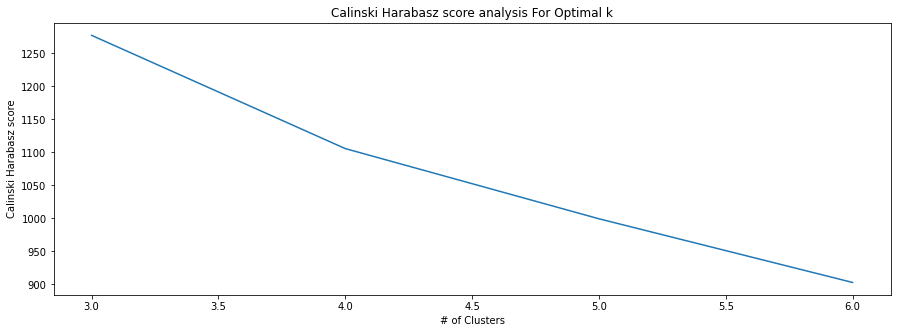

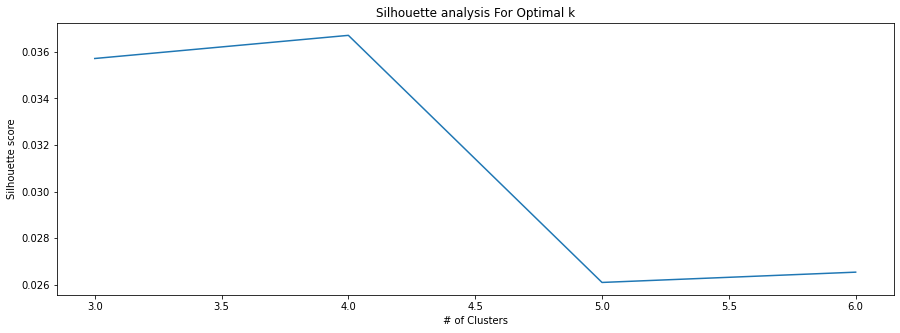

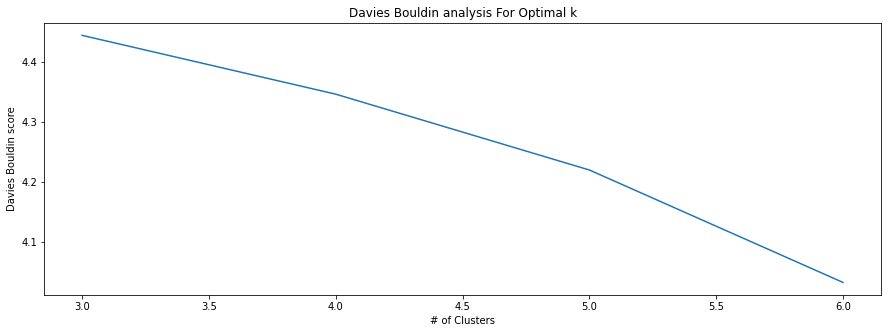

Silhoutte score(k=3): 0.03571662679314613
Davies Bouldin score(k=3): 4.444424697423301
Calinski Harabasz score(k=3): 1277.4126776200062
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.036710817366838455
Davies Bouldin score(k=4): 4.3465033705545455
Calinski Harabasz score(k=4): 1105.8782661189434
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.026097077876329422
Davies Bouldin score(k=5): 4.22027082912931
Calinski Harabasz score(k=5): 999.5569208370583
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.02653880976140499
Davies Bouldin score(k=6): 4.033069201964032
Calinski Harabasz score(k=6): 903.0850407949839
-----------------------------------------------------------------------


In [37]:
# all-MiniLM-L6-v2
plotKmeansMetrics(corpus_embeddings)

Best Kmeans k=3 --> all minilm-L6

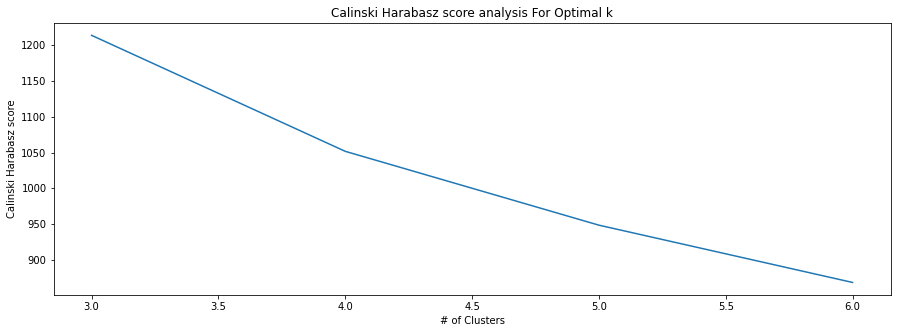

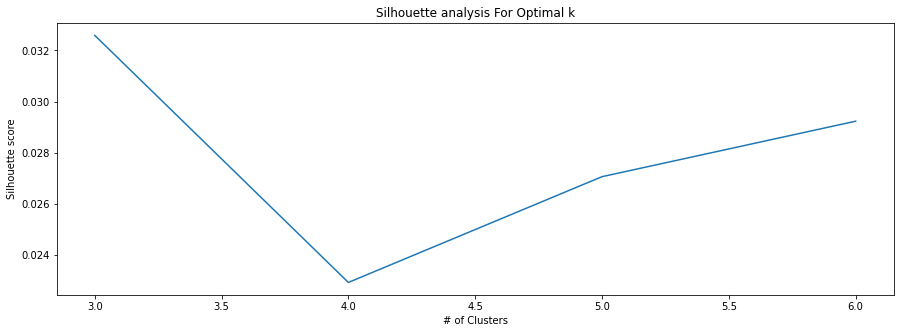

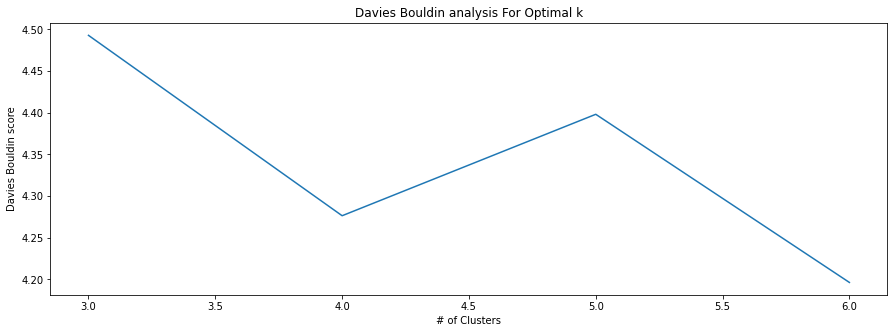

Silhoutte score(k=3): 0.032591626048088074
Davies Bouldin score(k=3): 4.492777927380318
Calinski Harabasz score(k=3): 1213.9067293361275
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.022936131805181503
Davies Bouldin score(k=4): 4.2764387941735
Calinski Harabasz score(k=4): 1051.6734864947916
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.027069365605711937
Davies Bouldin score(k=5): 4.398095918877557
Calinski Harabasz score(k=5): 948.3998335338987
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.029237352311611176
Davies Bouldin score(k=6): 4.196414873810352
Calinski Harabasz score(k=6): 868.2730140582831
-----------------------------------------------------------------------


In [38]:
# all-MiniLM-L12-v2
plotKmeansMetrics(corpus_embeddings_miniLM_L12)

Best K-means k = 3 --> all mini l12

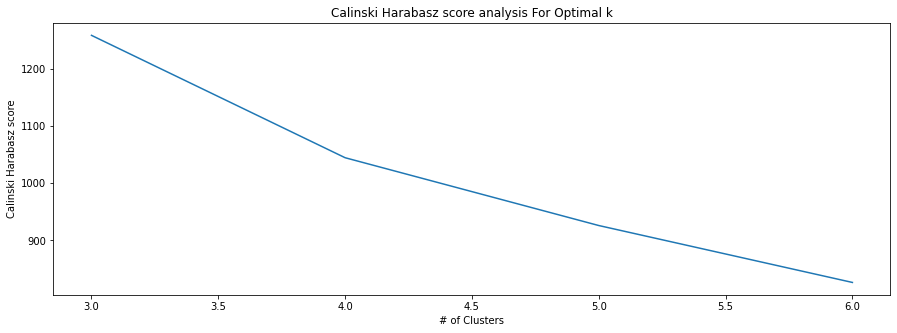

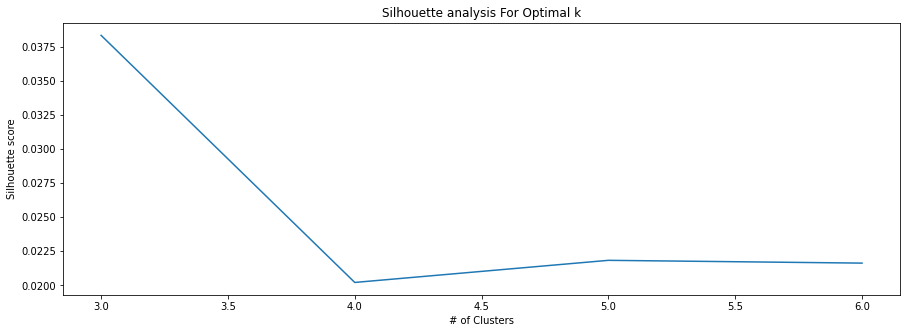

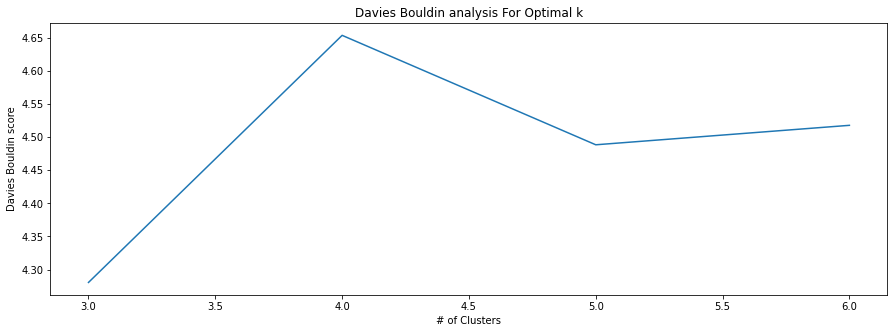

Silhoutte score(k=3): 0.038359493017196655
Davies Bouldin score(k=3): 4.28062725897027
Calinski Harabasz score(k=3): 1258.3291508506618
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.020212525501847267
Davies Bouldin score(k=4): 4.653327481177666
Calinski Harabasz score(k=4): 1044.4394082233941
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.02183680795133114
Davies Bouldin score(k=5): 4.488269387709709
Calinski Harabasz score(k=5): 925.9402995347274
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.021632172167301178
Davies Bouldin score(k=6): 4.517606090763384
Calinski Harabasz score(k=6): 826.4579141038562
-----------------------------------------------------------------------


In [39]:
plotKmeansMetrics(corpus_embeddings_universal)

Best K-means k=3 -->  universal

**With PCA**

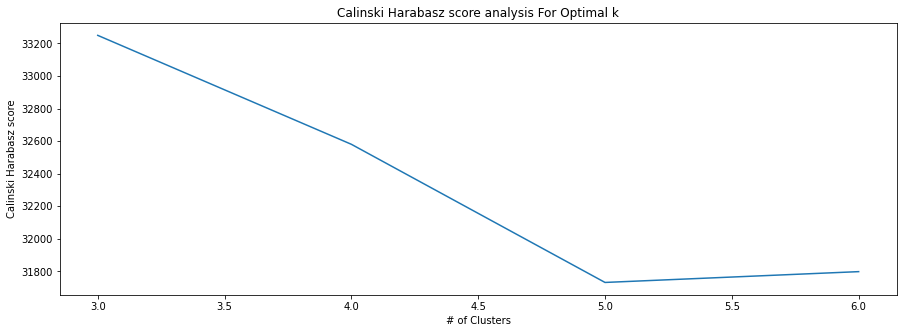

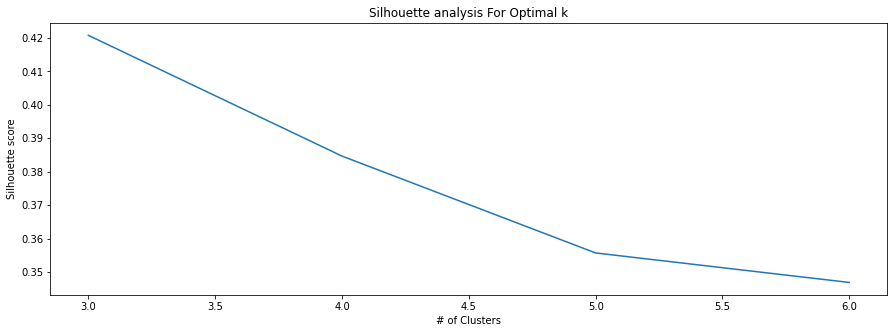

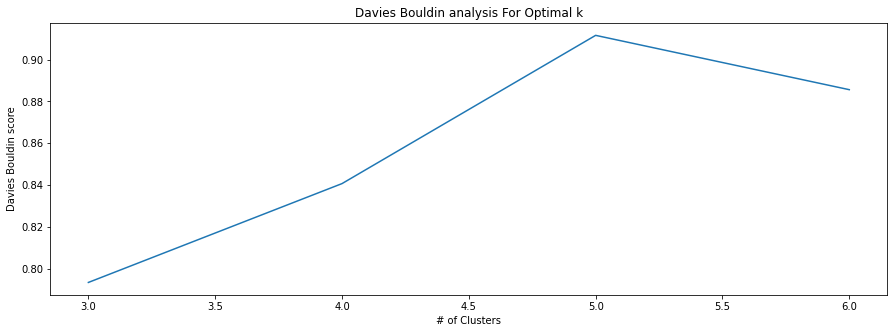

Silhoutte score(k=3): 0.4207710325717926
Davies Bouldin score(k=3): 0.7933260307625821
Calinski Harabasz score(k=3): 33249.41961183499
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.3846646249294281
Davies Bouldin score(k=4): 0.8406549754224346
Calinski Harabasz score(k=4): 32580.41968772902
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.3556935489177704
Davies Bouldin score(k=5): 0.9116370732415202
Calinski Harabasz score(k=5): 31732.196972591606
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.3468758165836334
Davies Bouldin score(k=6): 0.8856256945775466
Calinski Harabasz score(k=6): 31798.547256421974
-----------------------------------------------------------------------


In [40]:
plotKmeansMetrics(corpus_embeddings_miniLM_L6_pca)

Best Kmeans k=3 --> all minilm-L6 pca

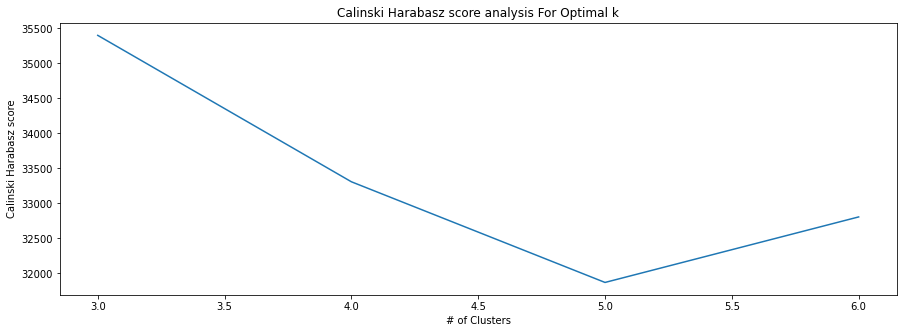

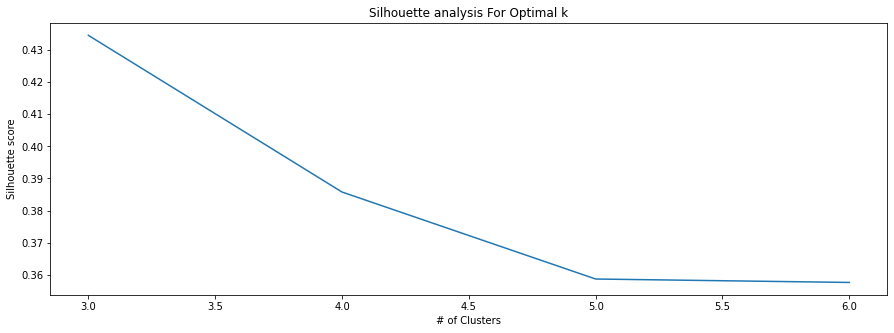

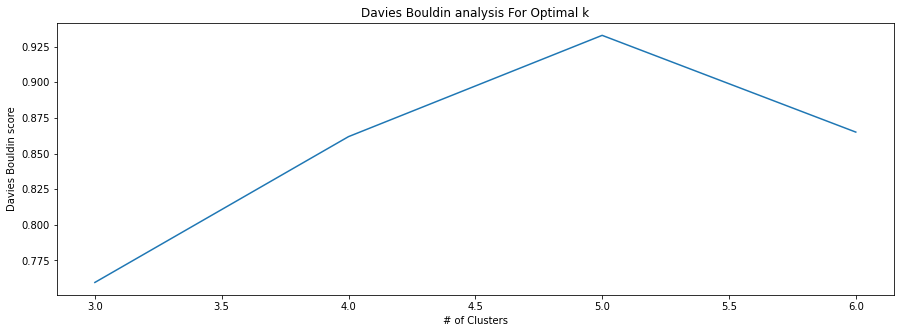

Silhoutte score(k=3): 0.4345470666885376
Davies Bouldin score(k=3): 0.759520046105608
Calinski Harabasz score(k=3): 35400.47840750805
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.3857770264148712
Davies Bouldin score(k=4): 0.861865214002459
Calinski Harabasz score(k=4): 33309.110547590506
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.3587000370025635
Davies Bouldin score(k=5): 0.9329488663948802
Calinski Harabasz score(k=5): 31871.147905937774
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.3576318919658661
Davies Bouldin score(k=6): 0.8650537476480736
Calinski Harabasz score(k=6): 32807.01664788548
-----------------------------------------------------------------------


In [41]:
plotKmeansMetrics(corpus_embeddings_miniLM_L12_pca)

Best Kmeans k=3 --> all minilm-L12 pca

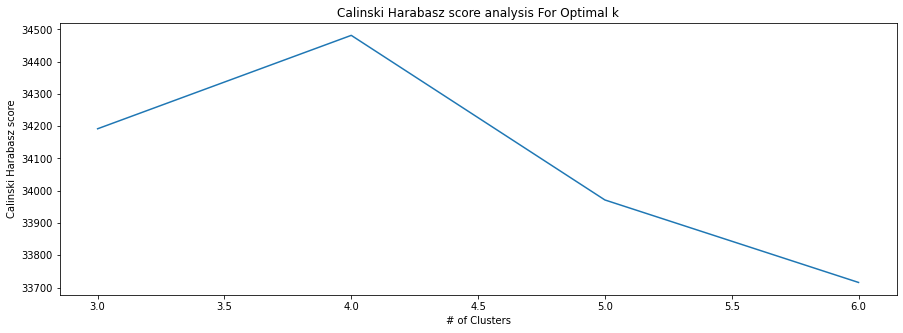

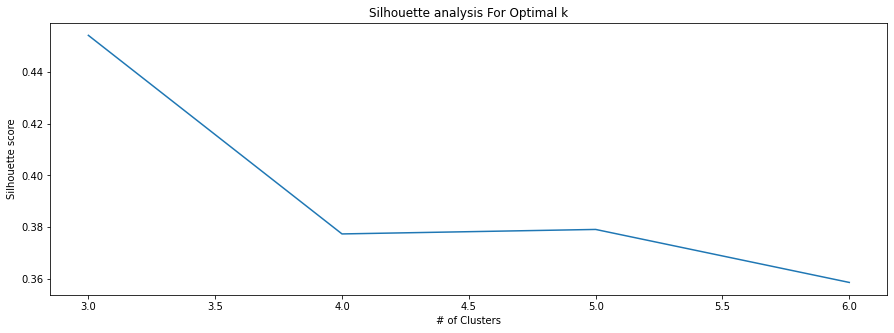

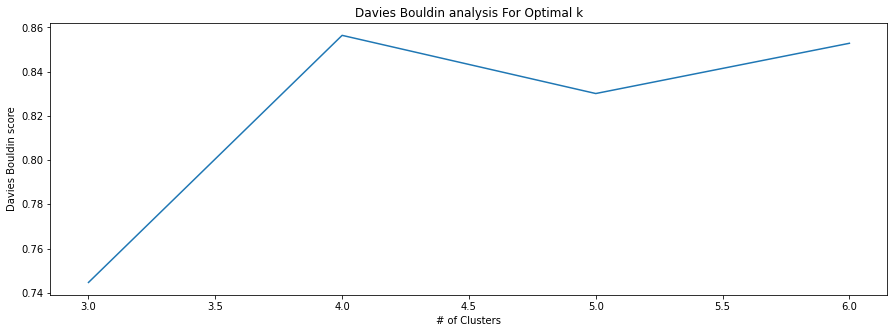

Silhoutte score(k=3): 0.4541026267120358
Davies Bouldin score(k=3): 0.7446574253570745
Calinski Harabasz score(k=3): 34191.958817504536
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.3773639227823758
Davies Bouldin score(k=4): 0.8563940039859321
Calinski Harabasz score(k=4): 34481.40070390365
-----------------------------------------------------------------------
Silhoutte score(k=5): 0.37909900286511045
Davies Bouldin score(k=5): 0.8300874765096102
Calinski Harabasz score(k=5): 33971.3657316596
-----------------------------------------------------------------------
Silhoutte score(k=6): 0.35861540850438
Davies Bouldin score(k=6): 0.8528137918037345
Calinski Harabasz score(k=6): 33715.78376786957
-----------------------------------------------------------------------


In [42]:
plotKmeansMetrics(corpus_embeddings_universal_pca)

Best Kmeans k=4 --> universal pca

### Spectral Clustering
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

**Spectral Clustering**

Spectral clustering is a clustering algorithm that uses the eigenvectors of a similarity matrix to cluster data points. It works by first constructing a similarity matrix, where each element represents the similarity between two data points. This can be done using a distance metric, such as the Euclidean distance or cosine similarity.

Next, the algorithm constructs a normalized graph Laplacian matrix from the similarity matrix. The eigenvectors of this matrix are then computed, and the k-means algorithm is applied to these eigenvectors to cluster the data points. The number of clusters k is specified by the user.

Spectral clustering is particularly useful when the data is non-linearly separable or when the clusters have complex shapes. It can also handle data with high dimensionality, as it only requires the computation of a similarity matrix and its eigenvectors, which can be done efficiently using matrix decomposition techniques.

One disadvantage of spectral clustering is that it can be sensitive to the choice of similarity measure and the number of eigenvectors used for clustering. Additionally, it may not be suitable for very large datasets, as the computation of the similarity matrix and eigenvectors can become computationally expensive.

In [16]:
from sklearn.cluster import SpectralClustering

def plotSpectralClusteringMetrics(data):
    davies_bouldin_scr = []
    silhouette_scr = []
    calinski_harabasz_scr = []

    k_min=3
    k_max = 6

    for k in range(k_min, k_max):
        cluster_labels = SpectralClustering(n_clusters=k,assign_labels="kmeans").fit_predict(data)
        silhouette_scr.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scr.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scr.append(calinski_harabasz_score(data,cluster_labels))

    plotMetrics(calinski_harabasz_scr,silhouette_scr,davies_bouldin_scr, k_min, k_max)

**With PCA**

In [17]:
plotSpectralClusteringMetrics(corpus_embeddings_miniLM_L6_pca)

In [ ]:
plotSpectralClusteringMetrics(corpus_embeddings_miniLM_L12_pca)

In [ ]:
plotSpectralClusteringMetrics(corpus_embeddings_universal_pca)

### DBSCAN
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

**Why DBSCAN?** 

Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real life data may contain irregularities, like:

Clusters can be of arbitrary shape such as those shown in the figure below. 
Data may contain noise. 

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20requires%20only%20two%20parameters,classified%20as%20a%20Core%20point.

In [20]:
from sklearn.cluster import DBSCAN
def plotDBSCANMetrics(data,eps,minPts):
    dbscan_clustering = DBSCAN(eps=eps,min_samples=minPts).fit(data)
    cluster_labels = dbscan_clustering.labels_
    
    print("Silhoutte score(minPts={} ,eps={}): {}".format(minPts,eps,silhouette_score(data, cluster_labels)))
    print("Davies Bouldin score(minPts={} ,eps={}): {}".format(minPts,eps,davies_bouldin_score(data, cluster_labels)))
    print("Calinski Harabasz score(minPts={} ,eps={}): {}".format(minPts,eps,calinski_harabasz_score(data,cluster_labels)))
    print("-----------------------------------------------------------------------")

In [21]:
from sklearn.neighbors import NearestNeighbors

def find_epsilon(data):

    # Compute the k-distance
    k = 50
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)
    distances = np.sort(distances[:,k-1], axis=0)

    # Plot the k-distance plot
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel('k-Distance')

    # Find the elbow point
    knee = np.argmax(np.diff(distances))
    plt.plot(knee, distances[knee], 'ro')

    # Choose the optimal value
    epsilon = distances[knee]
    print("Epsilon: ", epsilon)
    plt.show()

Epsilon:  0.11213716195639299


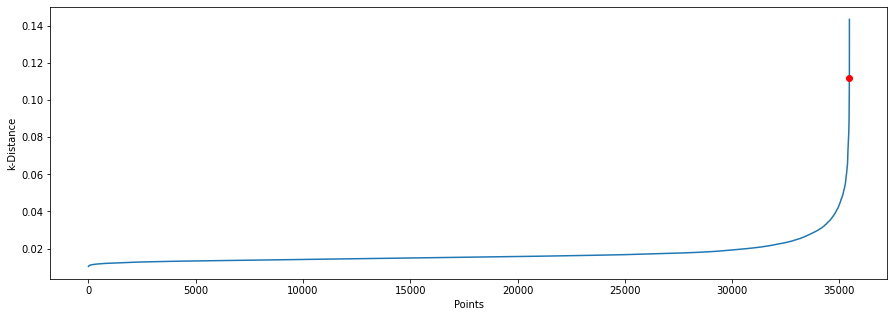

Epsilon:  0.10611051808933639


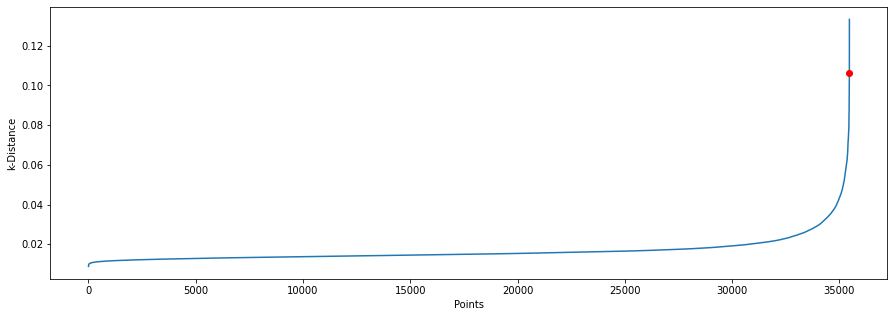

Epsilon:  0.13859123952425506


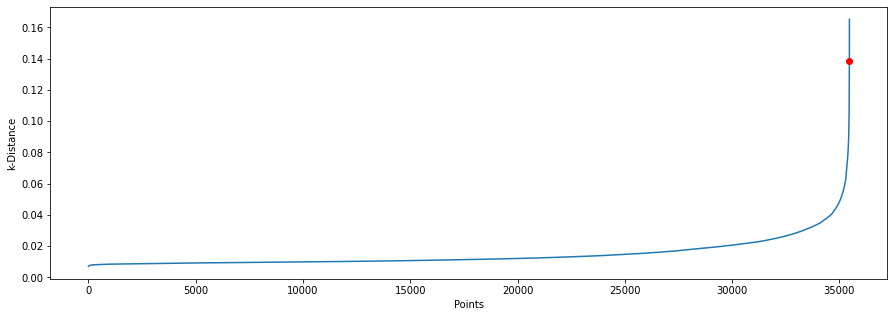

In [22]:
find_epsilon(corpus_embeddings_miniLM_L6_pca)
find_epsilon(corpus_embeddings_miniLM_L12_pca)
find_epsilon(corpus_embeddings_universal_pca)

In [33]:
plotDBSCANMetrics(corpus_embeddings_miniLM_L6_pca,0.0075,10)
plotDBSCANMetrics(corpus_embeddings_miniLM_L6_pca,0.0075,20)
plotDBSCANMetrics(corpus_embeddings_miniLM_L6_pca,0.0075,30)

Silhoutte score(minPts=10 ,eps=0.0075): -0.6879082918167114
Davies Bouldin score(minPts=10 ,eps=0.0075): 1.7335941867558875
Calinski Harabasz score(minPts=10 ,eps=0.0075): 36.865575144918026
-----------------------------------------------------------------------
Silhoutte score(minPts=20 ,eps=0.0075): -0.5597950220108032
Davies Bouldin score(minPts=20 ,eps=0.0075): 1.5858567119736133
Calinski Harabasz score(minPts=20 ,eps=0.0075): 40.82812124728743
-----------------------------------------------------------------------
Silhoutte score(minPts=30 ,eps=0.0075): -0.3068527281284332
Davies Bouldin score(minPts=30 ,eps=0.0075): 1.2427686656901027
Calinski Harabasz score(minPts=30 ,eps=0.0075): 29.271438215234255
-----------------------------------------------------------------------


In [29]:
plotDBSCANMetrics(corpus_embeddings_miniLM_L12_pca,0.0075,10)
plotDBSCANMetrics(corpus_embeddings_miniLM_L12_pca,0.0075,20)
plotDBSCANMetrics(corpus_embeddings_miniLM_L12_pca,0.0075,30)

Silhoutte score(minPts=10 ,eps=0.0075): -0.6631366014480591
Davies Bouldin score(minPts=10 ,eps=0.0075): 1.622426664077129
Calinski Harabasz score(minPts=10 ,eps=0.0075): 27.645385742396535
-----------------------------------------------------------------------
Silhoutte score(minPts=20 ,eps=0.0075): -0.5111235976219177
Davies Bouldin score(minPts=20 ,eps=0.0075): 2.0011158582909947
Calinski Harabasz score(minPts=20 ,eps=0.0075): 49.11619569583323
-----------------------------------------------------------------------
Silhoutte score(minPts=30 ,eps=0.0075): -0.613567590713501
Davies Bouldin score(minPts=30 ,eps=0.0075): 1.2024587414514873
Calinski Harabasz score(minPts=30 ,eps=0.0075): 27.984356470524467
-----------------------------------------------------------------------


In [34]:
plotDBSCANMetrics(corpus_embeddings_universal_pca,0.0075,10)
plotDBSCANMetrics(corpus_embeddings_universal_pca,0.0075,20)
plotDBSCANMetrics(corpus_embeddings_universal_pca,0.0075,30)

Silhoutte score(minPts=10 ,eps=0.0075): -0.5242672433413121
Davies Bouldin score(minPts=10 ,eps=0.0075): 1.413852380401665
Calinski Harabasz score(minPts=10 ,eps=0.0075): 118.81865215622331
-----------------------------------------------------------------------
Silhoutte score(minPts=20 ,eps=0.0075): -0.5945038169593356
Davies Bouldin score(minPts=20 ,eps=0.0075): 1.9926158044809668
Calinski Harabasz score(minPts=20 ,eps=0.0075): 134.4593583025224
-----------------------------------------------------------------------
Silhoutte score(minPts=30 ,eps=0.0075): -0.6328611312199071
Davies Bouldin score(minPts=30 ,eps=0.0075): 7.351066316942233
Calinski Harabasz score(minPts=30 ,eps=0.0075): 71.76324502945452
-----------------------------------------------------------------------


### Gaussian Mixture
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [12]:
from sklearn.mixture import GaussianMixture

def plotGaussianMixturesMetrics(data):
    davies_bouldin_scr = []
    silhouette_scr = []
    calinski_harabasz_scr = []

    component_max = 5
    component_min = 2
    for component in range(component_min, component_max):
        gmm = GaussianMixture(n_components=component, random_state=0)
        cluster_labels = gmm.fit_predict(data)
        silhouette_scr.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scr.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scr.append(calinski_harabasz_score(data, cluster_labels))

    plotMetrics(calinski_harabasz_scr,silhouette_scr,davies_bouldin_scr, component_min, component_max)


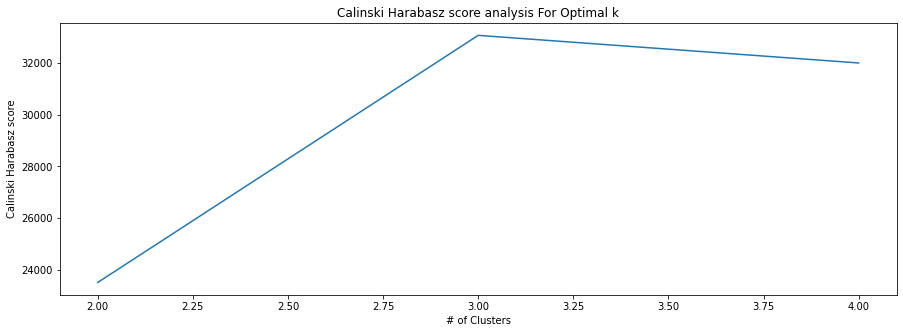

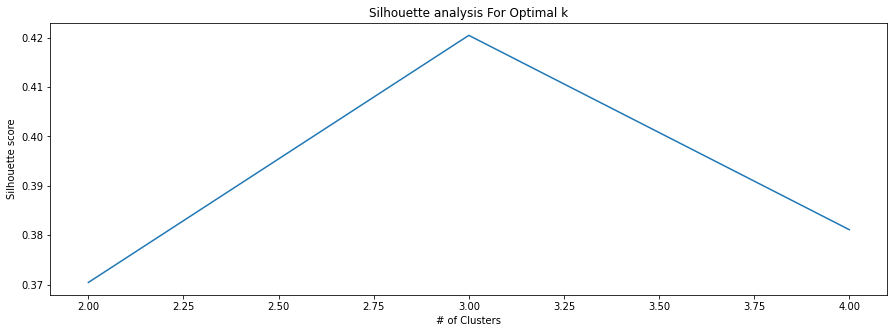

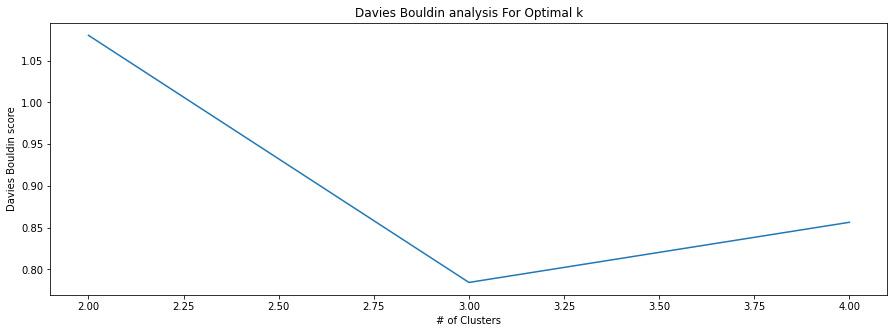

Silhoutte score(k=2): 0.37043777108192444
Davies Bouldin score(k=2): 1.0803611287800765
Calinski Harabasz score(k=2): 23506.983613123193
-----------------------------------------------------------------------
Silhoutte score(k=3): 0.4204484522342682
Davies Bouldin score(k=3): 0.7844803907069474
Calinski Harabasz score(k=3): 33079.438536327536
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.3811167776584625
Davies Bouldin score(k=4): 0.8565172219700626
Calinski Harabasz score(k=4): 32009.75895052034
-----------------------------------------------------------------------


In [13]:
plotGaussianMixturesMetrics(corpus_embeddings_miniLM_L6_pca)

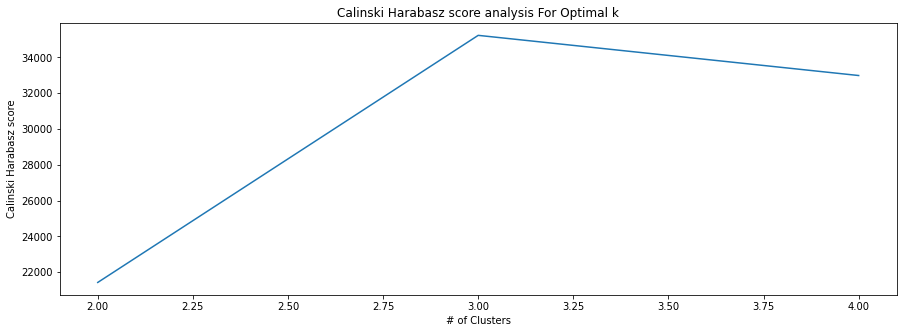

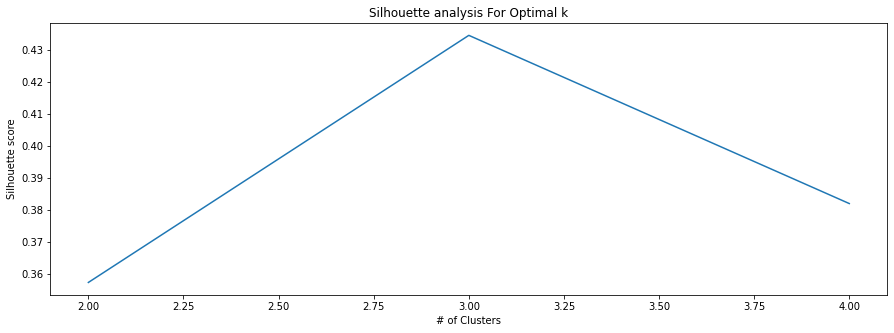

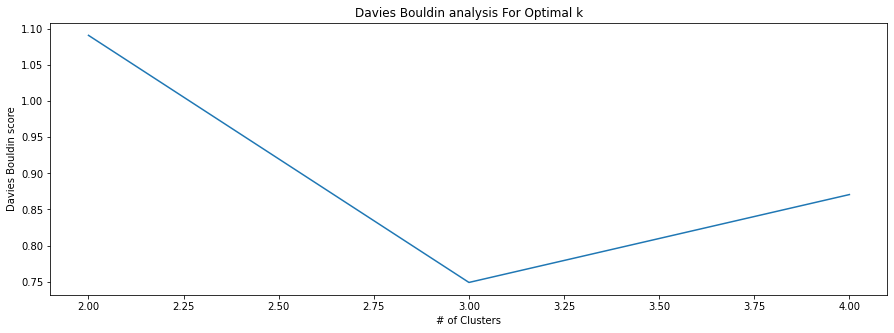

Silhoutte score(k=2): 0.35744965076446533
Davies Bouldin score(k=2): 1.0910719860891749
Calinski Harabasz score(k=2): 21427.42830981206
-----------------------------------------------------------------------
Silhoutte score(k=3): 0.43465524911880493
Davies Bouldin score(k=3): 0.7489616039044993
Calinski Harabasz score(k=3): 35230.51415365198
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.38210010528564453
Davies Bouldin score(k=4): 0.8706390798872928
Calinski Harabasz score(k=4): 32986.85696906945
-----------------------------------------------------------------------


In [14]:
plotGaussianMixturesMetrics(corpus_embeddings_miniLM_L12_pca)

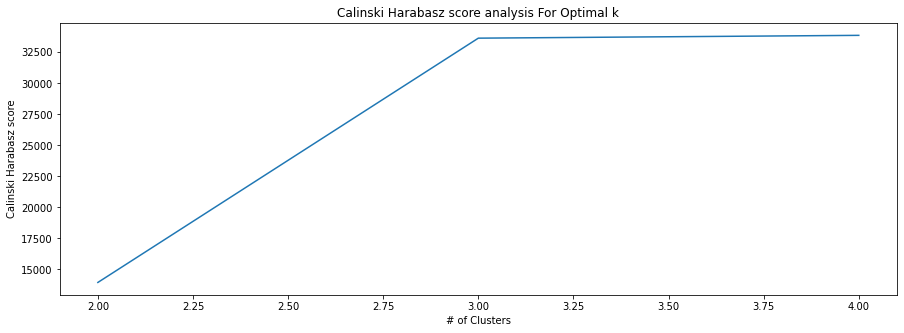

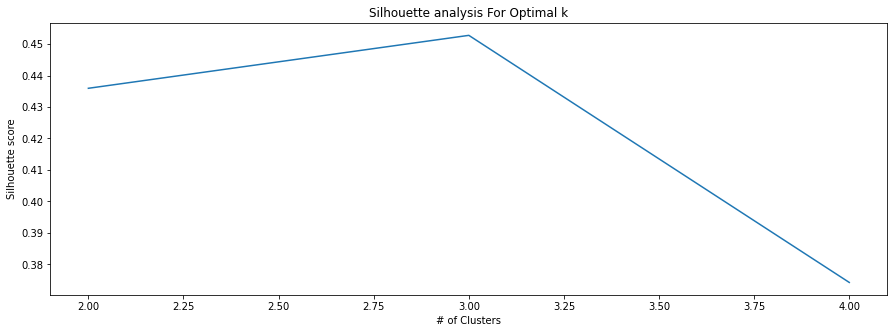

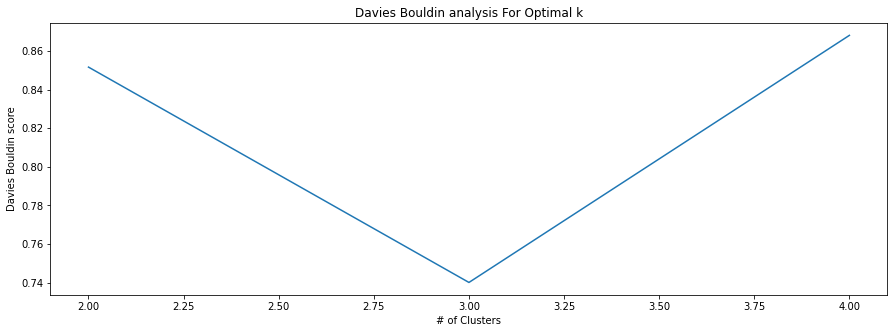

Silhoutte score(k=2): 0.43596545895497085
Davies Bouldin score(k=2): 0.8516215749003565
Calinski Harabasz score(k=2): 13947.314409215998
-----------------------------------------------------------------------
Silhoutte score(k=3): 0.45279573808530776
Davies Bouldin score(k=3): 0.7401644307700229
Calinski Harabasz score(k=3): 33638.7237987819
-----------------------------------------------------------------------
Silhoutte score(k=4): 0.37423163037346147
Davies Bouldin score(k=4): 0.8680552875467942
Calinski Harabasz score(k=4): 33864.951922015185
-----------------------------------------------------------------------


In [15]:
plotGaussianMixturesMetrics(corpus_embeddings_universal_pca)

### The most accurate clustering model you recommend

Present the operations for the selected clustering method and the text-to-vec pre-trained models pair again below.

In [19]:
# Kmeans
kmeans_l6 = KMeans(n_clusters=3).fit(corpus_embeddings_miniLM_L6_pca)
cluster_labels_l6 = kmeans_l6.labels_
print("Mini L6 PCA")
print("Calinski Harabasz score: ",calinski_harabasz_score(corpus_embeddings_miniLM_L6_pca,cluster_labels_l6))
print("Davis Bouldin score: ",davies_bouldin_score(corpus_embeddings_miniLM_L6_pca, cluster_labels_l6))
print("Silhoutte score: ",silhouette_score(corpus_embeddings_miniLM_L6_pca, cluster_labels_l6))


kmeans_l12 = KMeans(n_clusters=3).fit(corpus_embeddings_miniLM_L12_pca)
cluster_labels_l12 = kmeans_l12.labels_
print("Mini L12 PCA")
print("Calinski Harabasz score: ",calinski_harabasz_score(corpus_embeddings_miniLM_L12_pca,cluster_labels_l12))
print("Davis Bouldin score: ",davies_bouldin_score(corpus_embeddings_miniLM_L12_pca, cluster_labels_l12))
print("Silhoutte score: ",silhouette_score(corpus_embeddings_miniLM_L12_pca, cluster_labels_l12))


kmeans_uni = KMeans(n_clusters=4).fit(corpus_embeddings_universal_pca)
cluster_labels_uni = kmeans_uni.labels_
print("Universal PCA")
print("Calinski Harabasz score: ",calinski_harabasz_score(corpus_embeddings_universal_pca,cluster_labels_uni))
print("Davis Bouldin score: ",davies_bouldin_score(corpus_embeddings_universal_pca, cluster_labels_uni))
print("Silhoutte score: ",silhouette_score(corpus_embeddings_universal_pca, cluster_labels_uni))

Mini L6 PCA
Calinski Harabasz score:  33249.7095371235
Davis Bouldin score:  0.7935835417717062
Silhoutte score:  0.42074105
Mini L12 PCA
Calinski Harabasz score:  35401.90250621677
Davis Bouldin score:  0.7586515677105389
Silhoutte score:  0.4345882
Universal PCA
Calinski Harabasz score:  34478.46544931486
Davis Bouldin score:  0.8564316879928733
Silhoutte score:  0.37737768728553966


## Clustering Analysis

**Only for the most accurate clustering model you recommend**,

1.   How many clusters did the model you propose create?
2.   What is the number of papers in each cluster?
3.   What is the unique number of authors in each cluster?
4.   What are the top 3 most frequently used words (the words that describe the cluster) in each cluster?
        
        Ex: https://www.sbert.net/examples/applications/clustering/README.html


1. Mini L6 PCA

    There are 3 clusters.


2. Mini L12 PCA 
    
    There are 3 clusters.


3. Universal PCA
    
    There are 4 clusters.


In [20]:
from collections import Counter

# 2. the number of papers in each cluster
paper_num_l6 = Counter(cluster_labels_l6)
paper_num_l12 = Counter(cluster_labels_l12)
paper_num_uni = Counter(cluster_labels_uni)

print("The number of papers in L6 model: ",paper_num_l6)
print("The number of papers in L12 model: ",paper_num_l12)
print("The number of papers in Universal model: ",paper_num_uni)

The number of papers in L6 model:  Counter({1: 13100, 2: 12636, 0: 9737})
The number of papers in L12 model:  Counter({0: 13645, 1: 12088, 2: 9740})
The number of papers in Universal model:  Counter({3: 12420, 1: 10237, 0: 9353, 2: 3463})


In [21]:
# 3. the unique number of authors in each cluster
l6_class_0_id = []
l6_class_1_id = []
l6_class_2_id = []
for i in range(len(cluster_labels_l6)):
    if cluster_labels_l6[i] == 0:
        l6_class_0_id.append(df_all_publications["paper_id"][i])
    elif cluster_labels_l6[i] == 1:
        l6_class_1_id.append(df_all_publications["paper_id"][i])
    else:
        l6_class_2_id.append(df_all_publications["paper_id"][i])

l12_class_0_id = []
l12_class_1_id = []
l12_class_2_id = []
for i in range(len(cluster_labels_l12)):
    if cluster_labels_l12[i] == 0:
        l12_class_0_id.append(df_all_publications["paper_id"][i])
    elif cluster_labels_l12[i] == 1:
        l12_class_1_id.append(df_all_publications["paper_id"][i])
    else:
        l12_class_2_id.append(df_all_publications["paper_id"][i])

uni_class_0_id = []
uni_class_1_id = []
uni_class_2_id = []
uni_class_3_id = []
for i in range(len(cluster_labels_uni)):
    if cluster_labels_uni[i] == 0:
        uni_class_0_id.append(df_all_publications["paper_id"][i])
    elif cluster_labels_uni[i] == 1:
        uni_class_1_id.append(df_all_publications["paper_id"][i])
    elif cluster_labels_uni[i] == 2:
        uni_class_2_id.append(df_all_publications["paper_id"][i])
    else:
        uni_class_3_id.append(df_all_publications["paper_id"][i])


In [22]:
def find_unique_author_num(df, paper_id_list):
    unique_author_num = []
    for i in range(len(paper_id_list)):
        if (len(df.loc[df['publication'] == paper_id_list[i]]["author"].unique())) != 0:
            unique_author_num.append((df.loc[df['publication'] == paper_id_list[i]]["author"].unique())[0])
    return unique_author_num

In [23]:
l6_class_0_authorid = find_unique_author_num(df_selected_author_publications,l6_class_0_id)
l6_class_1_authorid = find_unique_author_num(df_selected_author_publications,l6_class_1_id)
l6_class_2_authorid = find_unique_author_num(df_selected_author_publications,l6_class_2_id)

l12_class_0_authorid = find_unique_author_num(df_selected_author_publications,l12_class_0_id)
l12_class_1_authorid = find_unique_author_num(df_selected_author_publications,l12_class_1_id)
l12_class_2_authorid = find_unique_author_num(df_selected_author_publications,l12_class_2_id)

uni_class_0_authorid = find_unique_author_num(df_selected_author_publications,uni_class_0_id)
uni_class_1_authorid = find_unique_author_num(df_selected_author_publications,uni_class_1_id)
uni_class_2_authorid = find_unique_author_num(df_selected_author_publications,uni_class_2_id)
uni_class_3_authorid = find_unique_author_num(df_selected_author_publications,uni_class_3_id)

print("L6, class 0 the number of unique authors: ", np.unique(l6_class_0_authorid).shape)
print("L6, class 1 the number of unique authors: ", np.unique(l6_class_1_authorid).shape)
print("L6, class 2 the number of unique authors: ", np.unique(l6_class_2_authorid).shape)

print("L12, class 0 the number of unique authors: ", np.unique(l12_class_0_authorid).shape)
print("L12, class 1 the number of unique authors: ", np.unique(l12_class_1_authorid).shape)
print("L12, class 2 the number of unique authors: ", np.unique(l12_class_2_authorid).shape)

print("UNI, class 0 the number of unique authors: ", np.unique(uni_class_0_authorid).shape)
print("UNI, class 1 the number of unique authors: ", np.unique(uni_class_1_authorid).shape)
print("UNI, class 2 the number of unique authors: ", np.unique(uni_class_2_authorid).shape)
print("UNI, class 3 the number of unique authors: ", np.unique(uni_class_3_authorid).shape)

L6, class 0 the number of unique authors:  (400,)
L6, class 1 the number of unique authors:  (481,)
L6, class 2 the number of unique authors:  (398,)
L12, class 0 the number of unique authors:  (424,)
L12, class 1 the number of unique authors:  (478,)
L12, class 2 the number of unique authors:  (393,)
UNI, class 0 the number of unique authors:  (385,)
UNI, class 1 the number of unique authors:  (443,)
UNI, class 2 the number of unique authors:  (350,)
UNI, class 3 the number of unique authors:  (486,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [25]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes


In [26]:
# 4. most 3 frequenlty used words in each cluster
def freq_word(paper_content, cluster_labels):
    docs_df = pd.DataFrame(paper_content, columns=["Doc"])
    docs_df['Topic'] = cluster_labels
    docs_df['Doc_ID'] = range(len(docs_df))
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(paper_content))
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
    topic_sizes = extract_topic_sizes(docs_df)
    print(topic_sizes)
    print(top_n_words[0][:3])
    print(top_n_words[1][:3])
    print(top_n_words[2][:3])
    return top_n_words, topic_sizes

In [27]:
print("L6\n")
words_l6 , size_l6 = freq_word(paper_content, cluster_labels_l6)
print("L12\n")
words_l12 , size_l12 = freq_word(paper_content, cluster_labels_l12)
print("UNI\n")
words_uni , size_uni = freq_word(paper_content, cluster_labels_uni)

L6

   Topic   Size
1      1  13100
2      2  12636
0      0   9737
[('learning', 0.007762129417073839), ('classification', 0.00721260717574531), ('method', 0.0069621468933946185)]
[('users', 0.00777885383199924), ('social', 0.007774335333722691), ('recommendation', 0.0077511011660420384)]
[('design', 0.005586778525228605), ('network', 0.005081239443226771), ('mobile', 0.005033563158670752)]
L12

   Topic   Size
0      0  13645
1      1  12088
2      2   9740
[('design', 0.005451097260402402), ('mobile', 0.004680564240849307), ('software', 0.004629443445761335)]
[('social', 0.008553691970672817), ('recommendation', 0.008382941456465846), ('users', 0.008201427097825212)]
[('classification', 0.007888066995202524), ('learning', 0.00768656205141203), ('image', 0.007433338666723558)]
UNI

   Topic   Size
3      3  12420
1      1  10237
0      0   9353
2      2   3463
[('algorithm', 0.008927333191268401), ('algorithms', 0.007107900852250089), ('problem', 0.00662617597405277)]
[('social', 0.0

## Clustering of Authors

Observe the method you recommended in a different area. Cluster authors by research area.
How you create the dataset is up to you. Note that you need to select features that will aid clustering by research area.

In [17]:
author_group = pd.DataFrame()
author_group = df_selected_author_publications
author_group = author_group.rename(columns={"publication": "paper_id"})
author_group = pd.merge(author_group, df_all_publications[['paper_id', 'paper_filtered_title']], on='paper_id', how='left')
display(author_group.head(5))


,author,paper_id,paper_filtered_title
0,4,173,adversarial learning of raw speech features fo...
1,4,174,learning content and usage factors simultaneou...
2,4,175,multi lingual speech recognition with low rank...
3,4,176,acoustic modelling for speech recognition in i...
4,4,177,deep neural network trained with speaker repre...


In [18]:
content = author_group.groupby(['author'])['paper_filtered_title'].apply(' '.join)
display(content)

author
4       adversarial learning of raw speech features fo...
6       representation mixing for tts synthesis hierar...
8       neural simpletrons learning in the limit of fe...
9       a dynamic service description for mobile envir...
11      learning network traffic dynamics using tempor...
15      cutting the size of compressed path databases ...
17      using monte carlo method to estimate the behav...
18      deep learning with logged bandit feedback unbi...
21      from evaluating to forecasting performance how...
24      bibliometric enhanced arxiv a data set for pap...
28      news recommender systems survey and roads ahea...
42      sagedb a learned database system top k off pol...
44      can a green thumb make a difference using a na...
45      characterization of local attitudes toward imm...
50      off set one pass factorization of feature sets...
51      multistakeholder recommendation with provider ...
54      how to not be annoying adjusting persuasive in...
61     

In [24]:
print(content.shape)
print(type(content))
content_values = content.values

(547,)
<class 'pandas.core.series.Series'>


In [27]:
embedder = SentenceTransformer('all-MiniLM-L12-v2')
author_embedding = embedder.encode(content_values)


In [28]:
# all-MiniLM-L12-v2
with open("author-embedding.pkl", "wb") as fOut:
    pickle.dump({ 'embeddings': author_embedding},fOut)

In [44]:
corpus_author = []
with open("author-embedding.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_author = cache_data['embeddings']

In [51]:
corpus_author_pca = pca.fit_transform(corpus_author)

kmeans = KMeans(n_clusters=5).fit(corpus_author_pca)
cluster_labels = kmeans.labels_
print("Mini L12 PCA")
print("Calinski Harabasz score: ",calinski_harabasz_score(corpus_author_pca,cluster_labels))
print("Davis Bouldin score: ",davies_bouldin_score(corpus_author_pca, cluster_labels))
print("Silhoutte score: ",silhouette_score(corpus_author_pca, cluster_labels))


Mini L12 PCA
Calinski Harabasz score:  419.1623518829623
Davis Bouldin score:  0.8872556969086581
Silhoutte score:  0.35564485


#Students who want to get extra points can also do additional work on the following research areas. This part is not mandatory.

## Semantic Search
 Selecting and presenting the papers closest to the entered text.


*   https://www.sbert.net/examples/applications/semantic-search/README.html
*   https://huggingface.co/course/chapter5/6?fw=pt





In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.

## Academic Ranking of Authors


In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.